In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import sys
from meta_model.utils import ndcg_sim, ndcg, custom_sim
import matplotlib.pyplot as plt
sys.path.append("meta_model")

In [2]:
# from sklearn.preprocessing import minmax_scale, StandardScaler, normalize
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE, MDS
# from scipy.stats import wasserstein_distance
# import matplotlib.pyplot as plt
# df1 = pd.read_csv("meta_dataset_creation/data/meta_features/original/if_meta_features.csv", index_col="id")
# df2 = pd.read_csv("meta_dataset_creation/data/meta_features/from_numeric/if_meta_features.csv", index_col="id")

# meta_X1 = df1.to_numpy()
# meta_X2 = df2.to_numpy()
# # sc = StandardScaler().fit(meta_X1)
# scaled_matrix1 = meta_X1/meta_X1.shape[1] #sc.transform(meta_X1)
# scaled_matrix2 = meta_X2/meta_X2.shape[1] #sc.transform(meta_X2)
# print("Number of meta features1:", meta_X1.shape[1])
# print("Number of instances1:", meta_X1.shape[0])
# print("Number of meta features2:", meta_X2.shape[1])
# print("Number of instances2:", meta_X2.shape[0])
# X = TSNE(n_components=2, metric=wasserstein_distance, init="pca",
#     learning_rate="auto", n_jobs=-1).fit_transform(np.concatenate((scaled_matrix1, scaled_matrix2)))

In [3]:
# plt.figure(figsize=(5, 5))
# plt.scatter(
#     X[:meta_X1.shape[0], 0], X[:meta_X1.shape[0], 1], s=20,
#     alpha=0.7,
#     linewidth=0,
#     c="green"
# )
# indices = np.random.choice(meta_X2.shape[0], size=500, replace=False) + meta_X1.shape[0]
# plt.scatter(
#     X[indices, 0], X[indices, 1], s=20,
#     alpha=0.7,
#     linewidth=0,
#     c="red"
# )
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()
# plt.show()

In [4]:
y1 = np.array([1, 0.95, 0.9, 0.8, 0.7])
y2 = np.array([0.9, 1, 0.95, 0.8, 0.7])
ndcg(y1**4, y2**4)

0.9462461629591796

In [5]:
benchmark_results = {}
benchmark_results_dir = "meta_dataset_creation/data/benchmark_results/"
clustering_algorithms = os.listdir(benchmark_results_dir)
clustering_algorithms

['kprototypes', 'haverage', 'fasterpam']

In [6]:
for algorithm in clustering_algorithms:
    benchmark_results[algorithm] = {}
    for name in os.listdir(os.path.join(benchmark_results_dir, algorithm)):
        benchmark_results[algorithm][name] = {}
        folder_path = os.path.join(benchmark_results_dir, algorithm, name)
        scores_dir = os.path.join(folder_path, "scores/")
        for filename in os.listdir(scores_dir):
            data_id = filename.split('.')[0]
            with open(os.path.join(scores_dir, filename), "rb") as f:
                result = pickle.load(f)
            for sim_pair in result:
                for eval_metric in result[sim_pair]:
                    if eval_metric not in benchmark_results[algorithm][name]:
                        benchmark_results[algorithm][name][eval_metric] = {}
                    if data_id not in benchmark_results[algorithm][name][eval_metric]:
                        benchmark_results[algorithm][name][eval_metric][data_id] = {}
                    benchmark_results[algorithm][name][eval_metric][data_id][sim_pair] = \
                        max([v["score"] for v in result[sim_pair][eval_metric]])
        for eval_metric in benchmark_results[algorithm][name]:
            benchmark_results[algorithm][name][eval_metric] = \
                pd.DataFrame.from_dict(benchmark_results[algorithm][name][eval_metric], orient='index')
            benchmark_results[algorithm][name][eval_metric] = \
                benchmark_results[algorithm][name][eval_metric].fillna(-1)
            max_ = benchmark_results[algorithm][name][eval_metric].max(axis=1)
            benchmark_results[algorithm][name][eval_metric] = benchmark_results[algorithm][name][eval_metric][max_ >= 0.7]
            print(algorithm, name, eval_metric, benchmark_results[algorithm][name][eval_metric].shape)

kprototypes from_numeric acc (78, 120)
kprototypes from_numeric ari (8, 120)
kprototypes from_numeric purity (93, 120)
kprototypes from_numeric sil (186, 120)
kprototypes original acc (41, 120)
kprototypes original ari (6, 120)
kprototypes original purity (60, 120)
kprototypes original sil (43, 120)
haverage original acc (51, 120)
haverage original ari (5, 120)
haverage original purity (55, 120)
haverage original sil (66, 120)
fasterpam original acc (19, 120)
fasterpam original ari (4, 120)
fasterpam original purity (33, 120)
fasterpam original sil (30, 120)


In [7]:
algorithm = 'kprototypes'
eval_metric = 'acc'
benchmark_results[algorithm]["original"][eval_metric].head()

,euclidean_hamming,euclidean_eskin,euclidean_iof,euclidean_of,euclidean_jaccard,euclidean_dice,euclidean_kulsinski,euclidean_rogerstanimoto,euclidean_russellrao,euclidean_sokalmichener,...,euclidean_co-oc,manhattan_co-oc,chebyshev_co-oc,sqeuclidean_co-oc,canberra_co-oc,mahalanobis_co-oc,cosine_co-oc,pearson_co-oc,lorentzian_co-oc,divergence_co-oc
339,0.777778,0.777778,0.777778,0.777778,0.666667,0.666667,0.666667,0.583333,0.666667,0.583333,...,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000
1455,0.933333,0.933333,0.908333,0.933333,0.933333,0.933333,0.933333,0.933333,0.916667,0.933333,...,0.908333,0.908333,0.908333,0.9,0.933333,0.9,0.583333,-1.0,0.916667,0.925
446,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,...,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000
481,0.737113,0.737113,0.737113,0.737113,0.757732,0.757732,0.757732,0.757732,0.757732,0.757732,...,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000
1412,0.765487,0.765487,0.765487,0.765487,0.765487,0.765487,0.761062,0.765487,0.761062,0.765487,...,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000


In [8]:
benchmark_results[algorithm]["from_numeric"][eval_metric].head()

,euclidean_hamming,euclidean_eskin,euclidean_iof,euclidean_of,euclidean_co-oc,euclidean_jaccard,euclidean_dice,euclidean_kulsinski,euclidean_rogerstanimoto,euclidean_russellrao,...,divergence_iof,divergence_of,divergence_co-oc,divergence_jaccard,divergence_dice,divergence_kulsinski,divergence_rogerstanimoto,divergence_russellrao,divergence_sokalmichener,divergence_sokalsneath
36_1062,0.861111,0.861111,0.861111,0.861111,0.861111,0.861111,0.861111,0.888889,0.861111,0.888889,...,0.861111,0.861111,0.861111,0.861111,0.861111,0.888889,0.833333,0.888889,0.833333,0.861111
55_476,0.560000,0.560000,0.560000,0.560000,0.560000,0.560000,0.560000,0.560000,0.560000,0.560000,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
247_476,0.640000,0.640000,0.640000,0.680000,0.800000,0.640000,0.640000,0.640000,0.640000,0.640000,...,0.620000,0.660000,0.800000,0.620000,0.640000,0.620000,0.620000,0.620000,0.620000,0.620000
309_683,0.700000,0.700000,0.716667,0.700000,-1.000000,0.700000,0.700000,0.700000,0.700000,0.700000,...,0.750000,0.716667,-1.000000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
466_683,0.683333,0.700000,0.683333,0.716667,0.733333,0.666667,0.650000,0.650000,0.700000,0.650000,...,0.666667,0.666667,0.716667,0.683333,0.666667,0.650000,0.700000,0.666667,0.700000,0.683333


In [9]:
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
mixed_meta_df = pd.read_csv("meta_dataset_creation/data/meta_features/original/meta_features.csv", index_col="id").drop_duplicates()
mixed_meta_df.index = mixed_meta_df.index.astype(str)
print("Number of meta features:", mixed_meta_df.shape[1])
print("Number of instances:", mixed_meta_df.shape[0])

Number of meta features: 61
Number of instances: 91


In [10]:
numeric_meta_df = pd.read_csv("meta_dataset_creation/data/meta_features/from_numeric/meta_features.csv", index_col="id").drop_duplicates()
numeric_meta_df.index = numeric_meta_df.index.astype(str)
print("Number of meta features:", numeric_meta_df.shape[1])
print("Number of instances:", numeric_meta_df.shape[0])

Number of meta features: 61
Number of instances: 500


In [11]:
from sklearn.metrics import pairwise_distances
index = benchmark_results[algorithm]["original"][eval_metric].index
mixed_Y = benchmark_results[algorithm]["original"][eval_metric][index.isin(mixed_meta_df.index)].to_numpy()
mixed_Yn = np.array([y/max(y) for y in mixed_Y])
mixed_Yn[mixed_Yn>0] **= 4
mixed_Yn[mixed_Yn<0] = -1

index = benchmark_results[algorithm]["from_numeric"][eval_metric].index
numeric_Y = benchmark_results[algorithm]["from_numeric"][eval_metric][index.isin(numeric_meta_df.index)].to_numpy()
numeric_Yn = np.array([y/max(y) for y in numeric_Y])
numeric_Yn[numeric_Yn>0] **= 4
numeric_Yn[numeric_Yn<0] = -1

# sim_matrix = pairwise_distances(mixed_Yn, metric=lambda y1,y2: ndcg_sim(y1,y2,p=5), n_jobs=-1)
sim_matrix = pairwise_distances(np.concatenate((mixed_Yn, numeric_Yn)), metric=lambda y1,y2: ndcg_sim(y1,y2,p=5), n_jobs=-1)
# sim_matrix = pairwise_distances(Y, metric=lambda y1,y2: custom_sim(y1,y2), n_jobs=-1)

In [12]:
# np.fill_diagonal(sim_matrix, 0)
# print(mixed_Yn.shape)
# for i, x in enumerate(np.argsort(-sim_matrix[:mixed_Yn.shape[0]], axis=1)[:, :10]):
#     print(x, sim_matrix[i][x])

In [13]:
index = benchmark_results[algorithm]["original"][eval_metric].index
mixed_X = mixed_meta_df.loc[[i for i in index if i in mixed_meta_df.index]].to_numpy()

index = benchmark_results[algorithm]["from_numeric"][eval_metric].index
numeric_X = numeric_meta_df.loc[[i for i in index if i in numeric_meta_df.index]].to_numpy()
sc = StandardScaler().fit(np.concatenate((mixed_X, numeric_X))) #StandardScaler().fit(mixed_X) #
mixed_X = sc.transform(mixed_X) # mixed_X/mixed_X.shape[1] #
numeric_X = sc.transform(numeric_X) # numeric_X/numeric_X.shape[1] #

mixed_X.shape, numeric_X.shape

((36, 61), (78, 61))

In [14]:
X = np.concatenate((mixed_X, numeric_X))
Y = np.concatenate((mixed_Y, numeric_Y))
Yn = np.concatenate((mixed_Yn, numeric_Yn))

In [15]:
k = 5
D = pairwise_distances(X, n_jobs=-1)
np.fill_diagonal(D, np.inf)
ndcg_nn_euclidean = []
for i, dist_vec in enumerate(D):
    nearest_neighbors = [j for j in np.argsort(dist_vec) if j != i][:k]
    ndcg_nn_euclidean.append(np.mean(sim_matrix[i][nearest_neighbors]))

# D = pairwise_distances(np.concatenate((mixed_X, numeric_X)), metric=wasserstein_distance, n_jobs=-1)
# np.fill_diagonal(D, np.inf)
# ndcg_nn_wasserstein = []
# for i, dist_vec in enumerate(D):
#     nearest_neighbors = [j for j in np.argsort(dist_vec) if j != i][:k]
#     ndcg_nn_wasserstein.append(np.mean(sim_matrix[i][nearest_neighbors]))

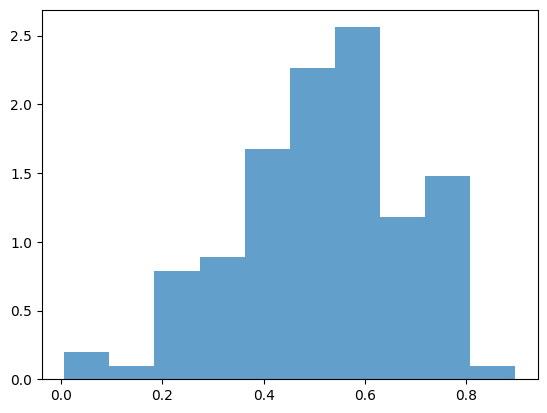

In [16]:
import matplotlib.pyplot as plt
plt.hist(ndcg_nn_euclidean, 10, density=True, alpha=0.7)
# plt.hist(ndcg_nn_wasserstein, 10, density=True, alpha=0.7)
plt.show()

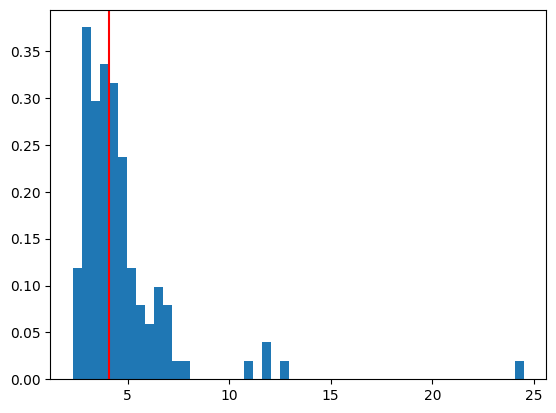

36


In [17]:
# D = pairwise_distances(X)
# np.fill_diagonal(D, np.inf)
nearest_neighbors_distance = np.sort(D, axis=1)[:, :5]
nearest_neighbors_distance = np.mean(nearest_neighbors_distance, axis=1)
median_distance = np.quantile(nearest_neighbors_distance, 0.5)
plt.hist(nearest_neighbors_distance, 50, density=True)
# plt.hist(nearest_neighbors_distance[:mixed_X.shape[0]], 30, density=True)
plt.axvline(median_distance, color="red")
plt.show()
selected_datasets = [i for i in range(mixed_X.shape[0])] # if nearest_neighbors_distance[i] <= median_distance and np.mean(sorted(sim_matrix[i], reverse=True)[:5])>0.95
# if np.mean(sorted(sim_matrix[i], reverse=True)[:3])>0.6 #if np.mean(sorted(sim_matrix[i][np.argsort(D[i])[:30]], reverse=True)[:5])>0.8
selected_datasets = np.array(selected_datasets)
print(len(selected_datasets))
# mixed_X = mixed_X[selected_datasets]
# mixed_Y = mixed_Y[selected_datasets]
# mixed_Yn = mixed_Yn[selected_datasets]

In [41]:
good_pairs = [[j for j, yj in enumerate(y) if yj/max(y) >= 0.95] for y in Y[selected_datasets]]
dist_matrix = D[selected_datasets][:, selected_datasets]
nearest_neighbors = np.argsort(dist_matrix, axis=1)[:, :5]

for i, neighbors in enumerate(nearest_neighbors):
    reduced_neighbors = [j for j in neighbors if i in nearest_neighbors[j]]
    print([len(set(good_pairs[i]).intersection(set(good_pairs[j]))) for j in reduced_neighbors])

[1]
[9]
[11, 3, 0, 9]
[5, 2]
[5]
[6, 9, 2, 0]
[15, 9, 1]
[62, 24, 43, 6, 3]
[]
[83, 43, 10, 59, 0]
[0, 2]
[]
[3, 20, 3, 4, 9]
[2]
[0, 3, 0]
[24, 22, 10, 2, 2]
[83, 62, 22, 9, 71]
[36, 15, 40, 35]
[59, 71, 20, 35, 15]
[3, 1, 11, 35]
[0, 1, 4, 0]
[10, 108]
[]
[40, 15]
[27, 19, 8, 36]
[1, 5]
[]
[10, 10, 1]
[]
[10, 108, 5]
[14, 8, 0, 15, 15]
[17, 19, 0]
[27, 17, 14, 35]
[]
[]
[]


In [31]:
list(zip(*np.triu_indices(4)))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 2),
 (2, 3),
 (3, 3)]

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import kneighbors_graph
import pygad

g = kneighbors_graph(X[selected_datasets], n_neighbors=5, metric="manhattan").toarray()
g = np.multiply(g, g.T)
sumg = np.sum(g)

def fitness_func(ga_instance, solution, solution_idx):
    s = 0
    for i, j in zip(*np.triu_indices(len(solution))):
        s += 1 if g[i, j] > 0 and solution[i] != solution[j] else 0
    s = 1 - s/sumg
    # n = 1 - len(set(solution))/len(solution)
    return s#(s + n)/ 2

fitness_function = fitness_func

num_generations = 1000
num_parents_mating = 100

sol_per_pop = 100
num_genes = len(selected_datasets)
gene_type = int

gene_space = good_pairs

parent_selection_type = "sss"
keep_elitism = 1
crossover_type = "single_point"
crossover_probability = 0.8
mutation_type = "random"
mutation_probability = 0.2

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_type=gene_type,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_elitism=keep_elitism,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                    #    parallel_processing=['process', 16],
                    #    save_best_solutions=True
                    )

ga_instance.run()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


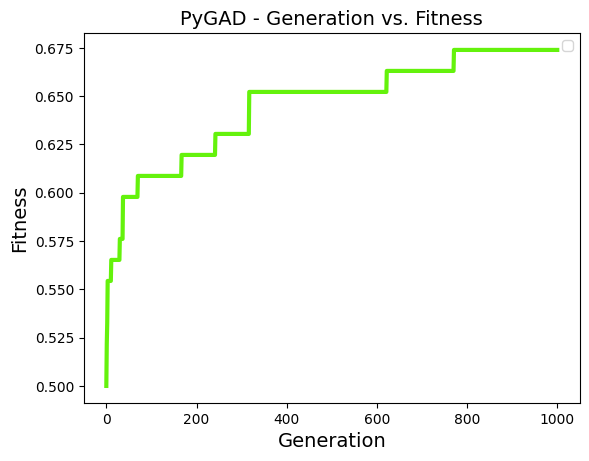

0.32608695652173914
24


In [121]:
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
s = 0
n_pairs = len(solution)*(len(solution) - 1)/2
for i, j in zip(*np.triu_indices(len(solution))):
    s += 1 if g[i, j] > 0 and solution[i] != solution[j] else 0
print(s/sumg)
print(len(set(solution)))

In [116]:
similarity_pairs = benchmark_results[algorithm]["original"][eval_metric].columns
print(set(similarity_pairs[solution]))

{'manhattan_eskin', 'chebyshev_iof', 'pearson_eskin', 'cosine_eskin', 'canberra_sokalsneath', 'sqeuclidean_of', 'pearson_co-oc', 'divergence_dice', 'mahalanobis_sokalmichener', 'divergence_of', 'mahalanobis_russellrao', 'divergence_eskin', 'manhattan_hamming', 'lorentzian_jaccard', 'manhattan_co-oc', 'cosine_of', 'canberra_iof', 'sqeuclidean_sokalsneath'}


In [75]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance

Xemb = TSNE(n_components=2, metric="manhattan").fit_transform(X[selected_datasets])
# Xemb = MDS(n_components=2, dissimilarity="precomputed").fit_transform(pairwise_distances(X[selected_datasets], metric="manhattan",n_jobs=-1))

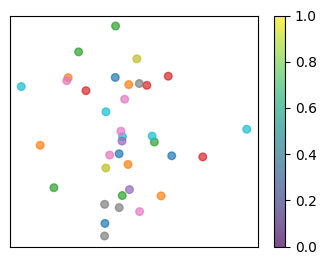

In [117]:
from matplotlib.colors import TABLEAU_COLORS
l = np.random.choice(list(TABLEAU_COLORS.values()), size=len(set(solution)))
colors = dict(zip(set(solution), l))
plt.figure(figsize=(4, 3))
plt.scatter(
    Xemb[:, 0], Xemb[:, 1],
    s=30, c=[colors[v] for v in solution],
    alpha=0.7
)
# plt.scatter(Xemb[bad, 0], Xemb[bad, 1], s=10, c="red", alpha=0.7)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
from meta_model.ranking import ALL_MODELS
from meta_model.ranking import scorer
import pygad

metrics = ["euclidean", "manhattan", "cosine"]
weights = ["uniform", "distance"]
def fitness_func(ga_instance, solution, solution_idx):
    selected_features = np.array(solution[:X.shape[1]])>0
    n_neighbors = solution[X.shape[1]]
    metric = metrics[solution[X.shape[1]+1]]
    w = weights[solution[X.shape[1]+2]]
    knn = ALL_MODELS["KNN"](n_neighbors=n_neighbors, metric=metric, weights=w)
    fitness = np.mean(cross_val_score(knn, X[selected_datasets][:, selected_features], Y[selected_datasets], cv=5, scoring=scorer))
    return fitness

fitness_function = fitness_func

num_generations = 200
num_parents_mating = 100

sol_per_pop = 100
num_genes = X.shape[1] + 3
gene_type = int

init_range_low = [0 for _ in range(X.shape[1])] + [1, 0, 0]
init_range_high = [1 for _ in range(X.shape[1])] + [20, 2, 1]
gene_space = [[0, 1] for _ in range(X.shape[1])] + [range(1, 21), range(3), [0, 1]]

parent_selection_type = "sss"
keep_elitism = 1
crossover_type = "single_point"
crossover_probability = 0.85
mutation_type = "random"
mutation_probability = 0.1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_type=gene_type,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_elitism=keep_elitism,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                    #    parallel_processing=['process', 16],
                    #    save_best_solutions=True
                    )

ga_instance.run()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


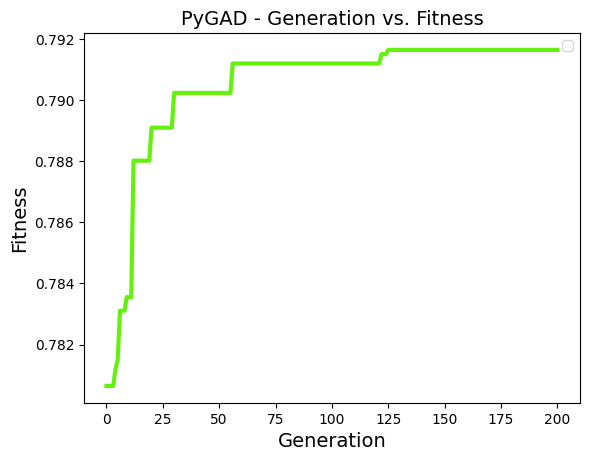

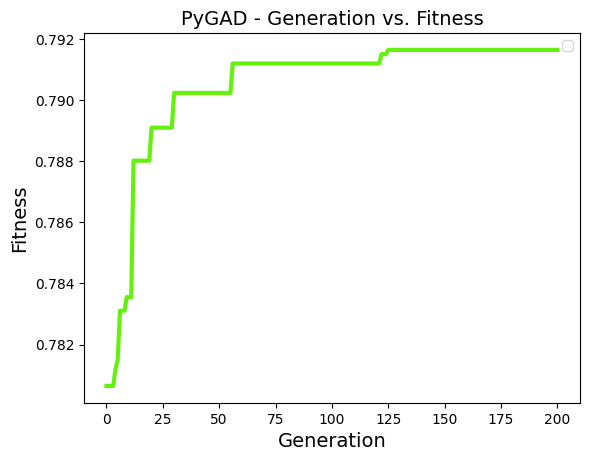

In [33]:
ga_instance.plot_fitness()

In [ ]:
# # from sklearn.model_selection import cross_val_score
# from meta_model.ranking import scorer
# import pygad

# max_features = [None, "sqrt", "log2"]
# def fitness_func(ga_instance, solution, solution_idx):
#     selected_features = np.array(solution[:X.shape[1]])>0
#     min_samples_leaf = solution[X.shape[1]]
#     max_depth = None if solution[X.shape[1]+1] < 2 else solution[X.shape[1]+1]
#     m = max_features[solution[X.shape[1]+2]]
#     dtree = ALL_MODELS["DTree"](min_samples_leaf=min_samples_leaf, max_depth=max_depth, max_features=m)
#     fitness = np.mean(cross_val_score(dtree, X[selected_datasets][:, selected_features], Y[selected_datasets], cv=5, scoring=scorer))
#     return fitness

# fitness_function = fitness_func

# num_generations = 200
# num_parents_mating = 50

# sol_per_pop = 100
# num_genes = X.shape[1] + 3
# gene_type = int

# init_range_low = [0 for _ in range(X.shape[1])] + [1, 0, 0]
# init_range_high = [1 for _ in range(X.shape[1])] + [20, 10, 2]
# gene_space = [[0, 1] for _ in range(X.shape[1])] + [range(1, 21), range(11), range(3)]

# parent_selection_type = "sss"
# keep_elitism = 1
# crossover_type = "single_point"
# crossover_probability = 0.85
# mutation_type = "random"
# mutation_probability = 0.1

# ga_instance2 = pygad.GA(num_generations=num_generations,
#                        num_parents_mating=num_parents_mating,
#                        fitness_func=fitness_function,
#                        sol_per_pop=sol_per_pop,
#                        num_genes=num_genes,
#                        gene_type=gene_type,
#                        init_range_low=init_range_low,
#                        init_range_high=init_range_high,
#                        gene_space=gene_space,
#                        parent_selection_type=parent_selection_type,
#                        keep_elitism=keep_elitism,
#                        crossover_type=crossover_type,
#                        crossover_probability=crossover_probability,
#                        mutation_type=mutation_type,
#                        mutation_probability=mutation_probability,
#                     #    parallel_processing=['process', 16],
#                     #    save_best_solutions=True
#                     )
# ga_instance2.run()

In [87]:
# def accept(y1, y2, t):
#     if y2 <= y1:
#         p = 1
#     else:
#         p = 0 if t==0 else np.exp((y1 - y2)/t)
#     return np.random.random() <= p
    
# def heating(fitness, sample_generator, update, N=1000, alpha=1.1, c0=0.8):
#     def f(t):
#         x1 = sample_generator()
#         x2 = update(x1)
#         y1, y2 = fitness(x1), fitness(x2)
#         return 1 if accept(y1, y2, t) else 0

#     t = 0
#     for _ in range(10):
#         x1 = sample_generator()
#         x2 = update(x1)
#         t += abs(fitness(x2) - fitness(x1))/10
        
#     p_accept = 0
#     while p_accept < c0:
#         p_accept = 0
#         for _ in range(N):
#             p_accept += f(t)/N
#         print(t, p_accept)
#         t = alpha*t
#     return t

# def cooling(fitness, sample_generator, update, t0, N=1000, alpha=0.99, tf=1e-4, save_search=False):
#     x1 = sample_generator()
#     y1 = fitness(x1)
#     best_x, best_y = x1, y1
#     if save_search:
#         search_history = {'temperature':[], 'best_y':[], 'y':[]}
#     iter = 0
#     n_iter_wt_improvement = 0
#     t = t0
#     while t > t0*tf and n_iter_wt_improvement < 20:
#         imp = False
#         if save_search:
#             search_history['temperature'].append(t)
#         for _ in range(N):
#             x2 = update(x1)
#             y2 = fitness(x2)
#             if accept(y1, y2, t):
#                 x1, y1 = x2, y2
#             if y2 < best_y:
#                 best_y = y2
#                 best_x = x2
#                 imp = True
#                 n_iter_wt_improvement = 0
        
#         if save_search:
#             search_history['best_y'].append(best_y)
#             search_history['y'].append(y1)

#         t = alpha*t
#         iter += 1
#         if not imp: 
#             n_iter_wt_improvement += 1
#         print("iteration: {}, best_y: {:.3f}".format(iter, best_y))
#     if save_search:
#         return best_x, best_y, search_history
#     return best_x, best_y

In [ ]:
# def select_features(X, Y, k=5):
#     def fitness(x):
#         s = 0
#         D = pairwise_distances(X[:, x>0], n_jobs=-1)
#         for i, dist_vec in enumerate(D):
#             neighbors = [j for j in np.argsort(dist_vec) if j != i][:k]
#             s += ndcg(Y[i], np.mean(Y[neighbors], axis=0))
#             # s += np.mean(ndcg([Y[i]], Y[neighbors]))
#         return -s/X.shape[0]
#     # def fitness(x):
#     #     knn = ALL_MODELS["KNN"]()
#     #     _, s = knn.cross_val_fit(X[:, x>0], Y, return_cv_scores=True)
#     #     return -s

#     def sample_generator():
#         return np.random.randint(2, size=X.shape[1])

#     def update(x):
#         indices = np.random.choice(X.shape[1], size=1) #np.random.randint(5)
#         new_x = np.array(x)
#         new_x[indices] = 1 - new_x[indices]
#         return new_x

#     t0 = heating(fitness, sample_generator, update, N=500)
#     # t0 = 0.0015
#     print("t0: {}".format(t0))
#     best_x, best_y, search_history = cooling(fitness, sample_generator, update, t0, N=500, alpha=0.98, save_search=True)
#     print("best_x: {} best_y: {:.3f}".format(best_x, best_y))
#     import matplotlib.pyplot as plt
#     plt.plot(search_history["best_y"])
#     plt.show()
#     return best_x, best_y
# best_x, best_y = select_features(X, Yn)

In [34]:
from meta_model.utils import ndcg
from meta_model.ranking import ALL_MODELS
from meta_model.ranking_tree import RankingTree
from sklearn.model_selection import KFold, cross_val_predict

models = {
    "KNN": ALL_MODELS["KNN"](),
    # "DTree": ALL_MODELS["DTree"](),
    "KNN with FS": ALL_MODELS["KNN"](),
    # "DTree with FS": ALL_MODELS["DTree"](),
}
cv = KFold(n_splits=5)
predictions = {model_name: np.zeros(shape=(len(selected_datasets), 120)) for model_name in models}
predictions["AR"] = np.zeros(shape=(len(selected_datasets), 120))
i = 0

models["KNN"] = models["KNN"].cross_val_fit(X[selected_datasets], Y[selected_datasets], n_splits=5) #
predictions["KNN"] = cross_val_predict(models["KNN"], X[selected_datasets], Y[selected_datasets], cv=cv)
# models["DTree"] = models["DTree"].cross_val_fit(X[selected_datasets], Y[selected_datasets], n_splits=5) #
# predictions["DTree"] = cross_val_predict(models["DTree"], X[selected_datasets], Y[selected_datasets], cv=cv)

solution, solution_fitness, solution_idx = ga_instance.best_solution()
selected_features = np.array(solution[:X.shape[1]])>0
n_neighbors = solution[X.shape[1]]
metric = metrics[solution[X.shape[1]+1]]
w = weights[solution[X.shape[1]+2]]
knn = ALL_MODELS["KNN"](n_neighbors=n_neighbors, metric=metric, weights=w)
predictions["KNN with FS"] = cross_val_predict(knn, X[selected_datasets][:, selected_features], Y[selected_datasets], cv=cv)

# solution, solution_fitness, solution_idx = ga_instance2.best_solution()
# selected_features = np.array(solution[:X.shape[1]])>0
# min_samples_leaf = solution[X.shape[1]]
# max_depth = None if solution[X.shape[1]+1] < 2 else solution[X.shape[1]+1]
# m = max_features[solution[X.shape[1]+2]]
# dtree = ALL_MODELS["DTree"](min_samples_leaf=min_samples_leaf, max_depth=max_depth, max_features=m)
# predictions["DTree with FS"] = cross_val_predict(dtree, X[selected_datasets][:, selected_features], Y[selected_datasets], cv=cv)


predictions["AR"] = np.array([
    [np.mean([v for v in Y[selected_datasets, j] if v > 0]) for j in range(Y.shape[1])]
    for _ in selected_datasets
])

In [39]:
sum(solution[:-3]>0)

28

In [43]:
mixed_meta_df.columns[features]

Index(['n_features', 'n_num_att', 'min_means_num_att', 'mean_means_num_att',
       'q3_means_num_att', 'min_std_num_att', 'mean_std_squared_num_att',
       'min_means_internal_product_num_att',
       'q1_means_internal_product_num_att',
       'q3_means_internal_product_num_att',
       'max_means_internal_product_num_att',
       'max_std_internal_product_num_att', 'mean_covariance', 'q3_covariance',
       'max_covariance', 'q1_card_cat_att', 'mean_card_cat_att',
       'min_entropy_cat_att', 'mean_entropy_cat_att', 'q3_entropy_cat_att',
       'max_entropy_cat_att', 'min_mutual_info_cat_att',
       'q1_mutual_info_cat_att', 'mean_mutual_info_cat_att',
       'min_std_freq_cat_att', 'mean_std_freq_cat_att', 'q3_std_freq_cat_att',
       'max_std_freq_cat_att'],
      dtype='object')

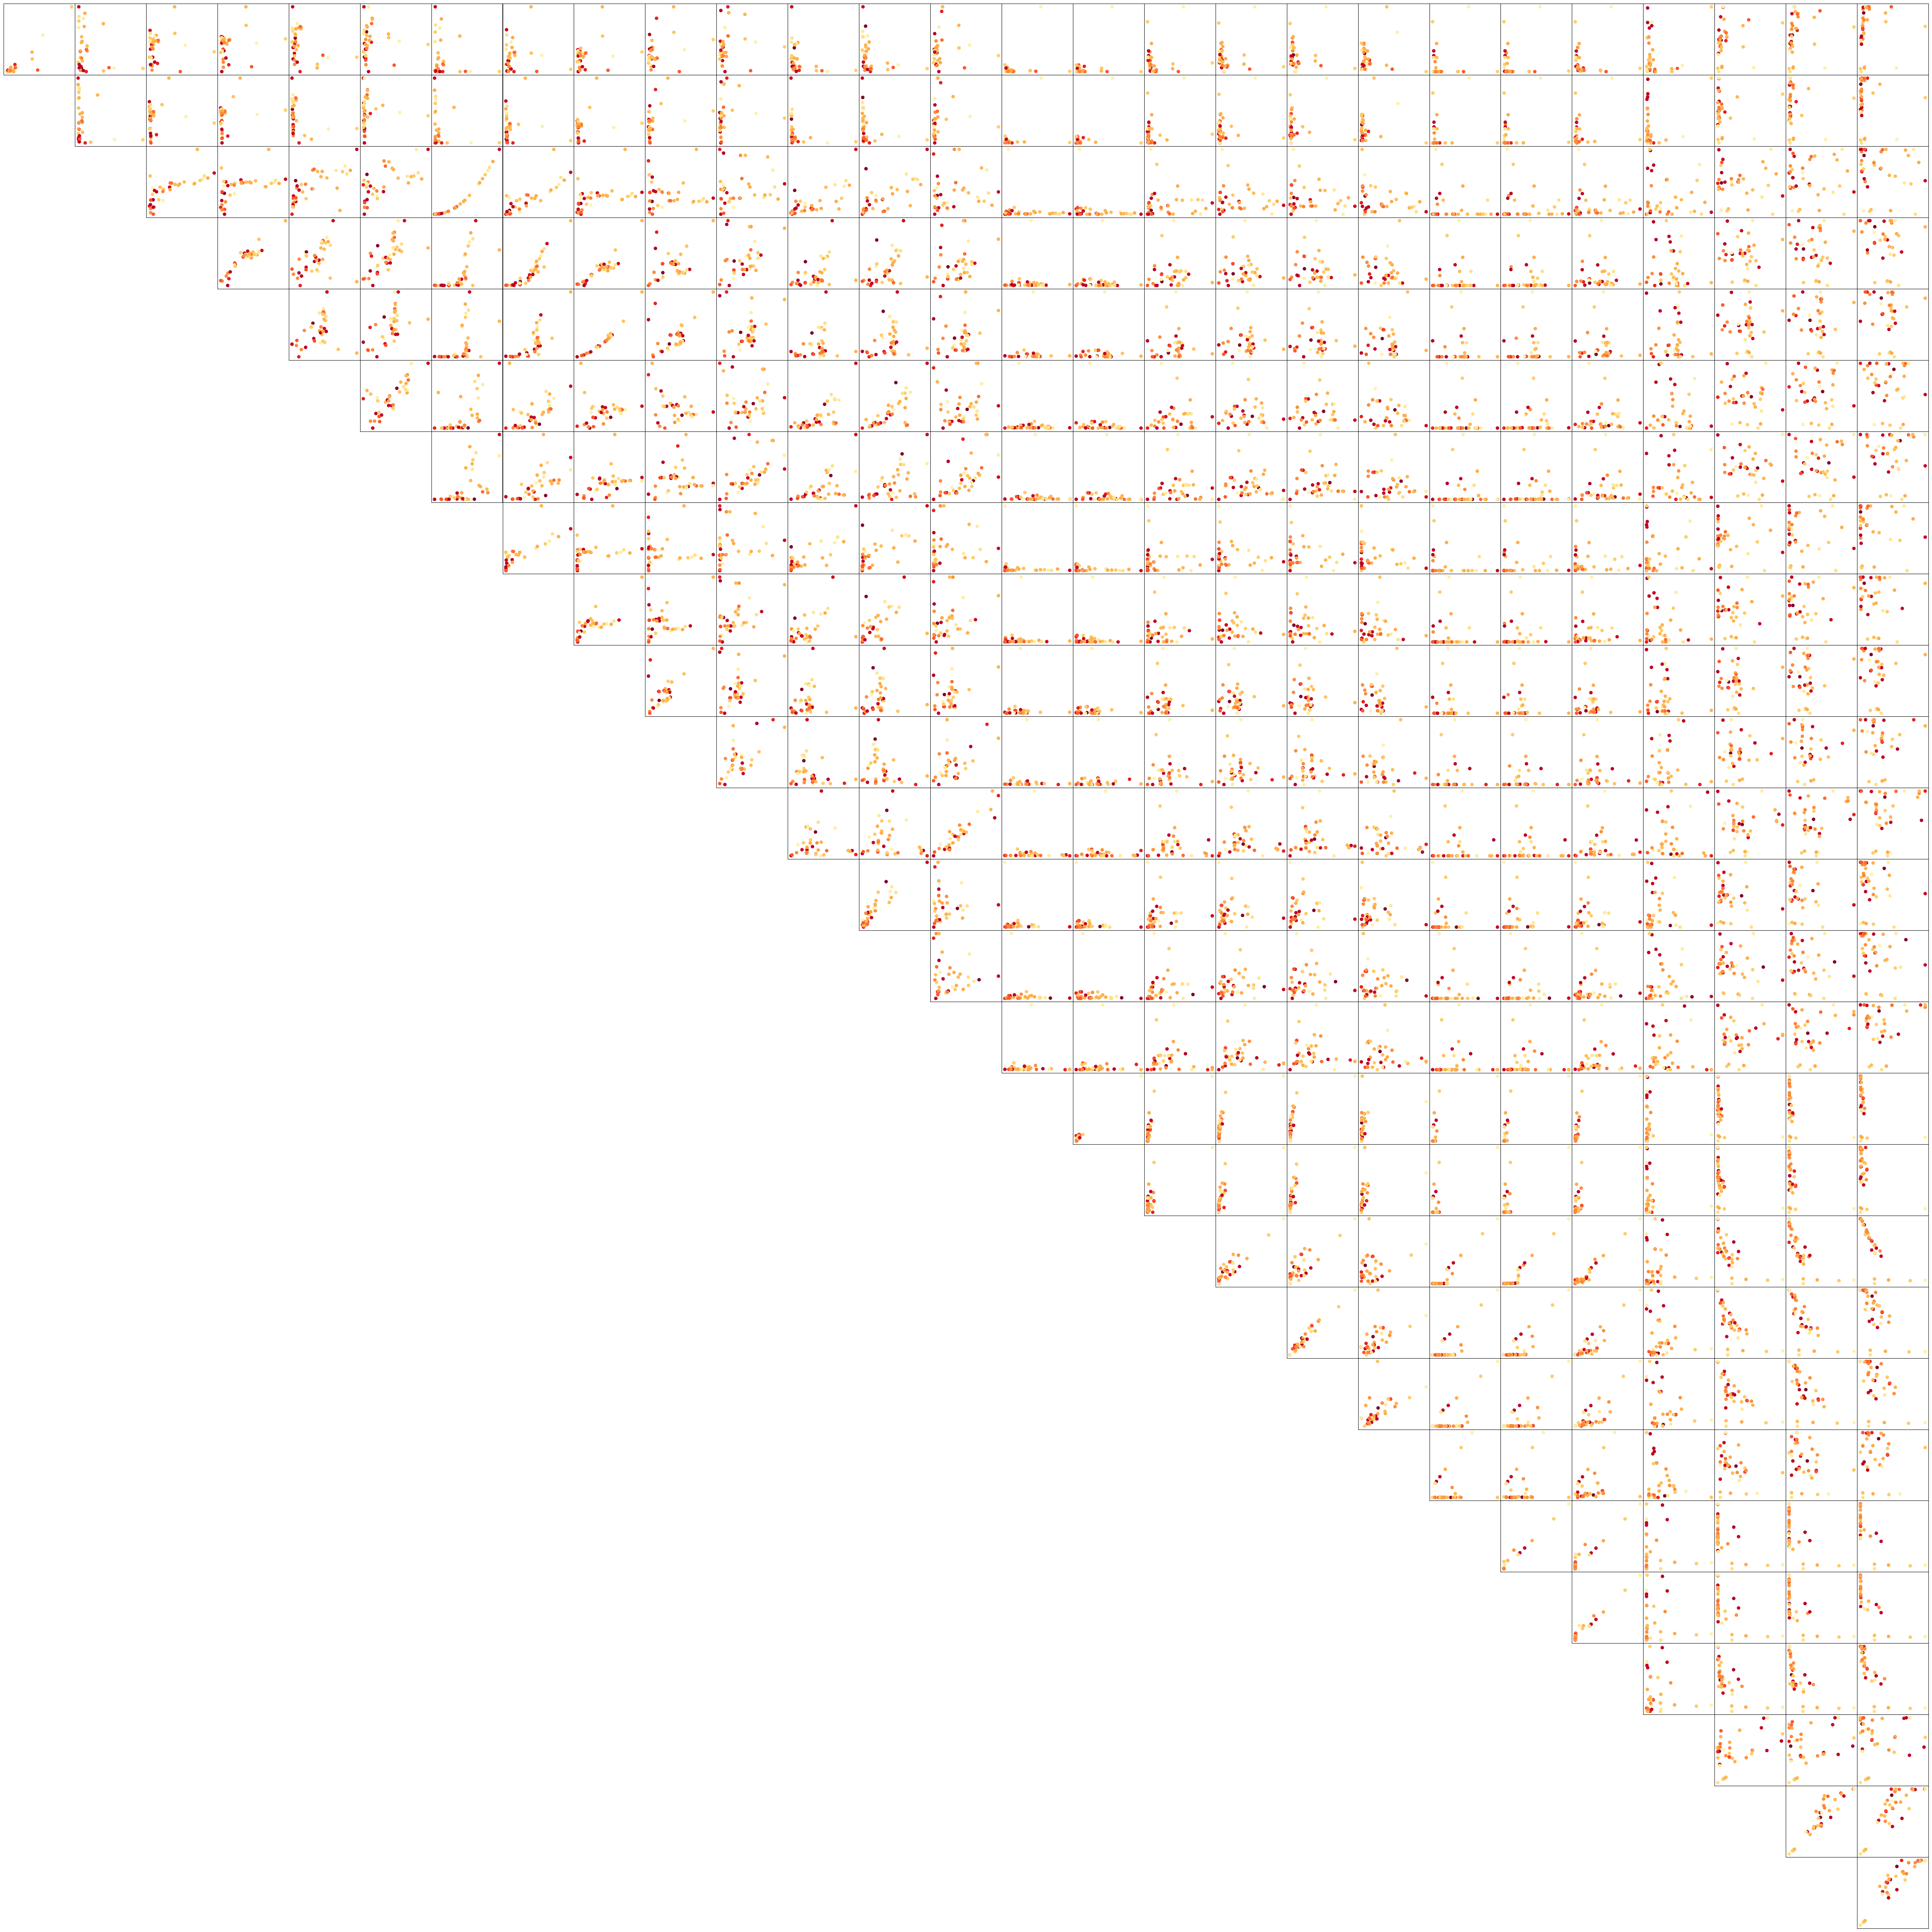

In [41]:
sim_pair = np.argmax(mixed_Y[0]) #sim_pairs_index["manhattan_hamming"]
features = [i for i, v in enumerate(selected_features) if v]
n_rows = len(features)
n_cols = len(features)
plt.figure(figsize=(2*n_cols, 2*n_rows))
for i in range(n_rows - 1):
    for j in range(i+1, n_cols):
        plt.subplot(n_rows, n_cols, i*n_cols + j + 1)
        plt.scatter(mixed_X[:,features[i]], mixed_X[:,features[j]], c=sim_matrix[0, :mixed_X.shape[0]], cmap="YlOrRd", vmin=0., vmax=1)
        # plt.scatter(mixed_X[:,features[i]], mixed_X[:,features[j]], c=sim_matrix[0, :mixed_X.shape[0]], cmap="YlOrRd", vmin=0.5, vmax=1)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout(h_pad=0, w_pad=0)
plt.show()

In [47]:
import torch
import torch.nn as nn
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"
print("device:", device)

class View(nn.Module):
    def __init__(self, shape):
        super(View, self).__init__()
        self.shape = shape
    def forward(self, x):
        return x.view(*self.shape)

device: cuda:0


In [82]:
from metric_learning import ContrastiveML
import ranking
from sklearn.metrics import pairwise_distances

class MetaModel():
    def __init__(self, mapping_function=None, ranking_model="KNN", margin=1, device="cpu"):
        self.metric_learner = None if mapping_function is None else \
            ContrastiveML(mapping_function, margin)
        self.ranker = ranking.ALL_MODELS[ranking_model]()
        self.device = device

    def _create_similarity_matrix(self, Y1, Y2=None):
        return pairwise_distances(Y1, Y2, metric=lambda y1,y2: ndcg_sim(y1,y2,p=5), n_jobs=-1)
        # return pairwise_distances(Y1, Y2)
        # return pairwise_distances(Y1, Y2, metric=lambda y1, y2: custom_sim(y1, y2), n_jobs=-1)

    def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
        if self.metric_learner is None:
            return self
        sim_matrix = self._create_similarity_matrix(Y_train)
        X1, X2, y = [], [], []
        for i in range(X_train.shape[0]-1):
            for j in range(i+1, X_train.shape[0]):
                X1.append(X_train[i])
                X2.append(X_train[j])
                similar = sim_matrix[i, j] > 0.95
                y.append(0 if similar else 1)
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
        print()
        print("classes distribution in train set:", np.unique(y, return_counts=True))
        train_dataset = torch.utils.data.TensorDataset(
            torch.tensor(X1, device=self.device).float(),
            torch.tensor(X2, device=self.device).float(),
            torch.tensor(y, device=self.device).float()
        )
        test_dataset = None
        if X_test is not None:
            sim_matrix = self._create_similarity_matrix(Y_test, Y_train)
            X1, X2, y = [], [], []
            for i in range(X_test.shape[0]):
                for j in range(X_train.shape[0]):
                    X1.append(X_test[i])
                    X2.append(X_train[j])
                    similar = sim_matrix[i, j] > 0.95
                    y.append(0 if similar else 1)
            X1, X2, y = np.array(X1), np.array(X2), np.array(y)
            print()
            print("classes distribution in test set:", np.unique(y, return_counts=True))
            test_dataset = torch.utils.data.TensorDataset(
                torch.tensor(X1, device=self.device).float(),
                torch.tensor(X2, device=self.device).float(),
                torch.tensor(y, device=self.device).float()
            )
        
        self.metric_learner.to(self.device)
        optimizer = torch.optim.Adam(self.metric_learner.parameters(), lr=metric_learning_params["lr"])
        metric_learning_params.pop("lr")
        self.metric_learner.fit(train_dataset, optimizer, test_dataset=test_dataset, **metric_learning_params)
        return self

    # def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
    #     if self.metric_learner is None:
    #         return self
    #     sim_matrix = self._create_similarity_matrix(Y_train)
    #     d = pairwise_distances(X_train)
    #     np.fill_diagonal(d, np.inf)
    #     k = 30
    #     nearest_neighbors = np.argsort(d, axis=1)[:, :k]
    #     X1, X2, y = [], [], []
    #     for i in range(X_train.shape[0]):
    #         l = [j for j in np.argsort(-sim_matrix[i]) if j in nearest_neighbors[i]][:5]
    #         for j in nearest_neighbors[i]:
    #             if j in l:
    #                 X1.append(X_train[i])
    #                 X2.append(X_train[j])
    #                 y.append(0)
    #             elif sim_matrix[i, j] < 0.95:
    #                 X1.append(X_train[i])
    #                 X2.append(X_train[j])
    #                 y.append(1)

    #     X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #     print()
    #     print("classes distribution in train set:", np.unique(y, return_counts=True))
    #     train_dataset = torch.utils.data.TensorDataset(
    #         torch.tensor(X1, device=self.device).float(),
    #         torch.tensor(X2, device=self.device).float(),
    #         torch.tensor(y, device=self.device).float()
    #     )
    #     test_dataset = None
    #     if X_test is not None:
    #         sim_matrix = self._create_similarity_matrix(Y_test, Y_train)
    #         d = pairwise_distances(X_test, X_train)
    #         nearest_neighbors = np.argsort(d, axis=1)[:, :k]
    #         X1, X2, y = [], [], []
    #         for i in range(X_test.shape[0]):
    #             l = [j for j in np.argsort(-sim_matrix[i]) if j in nearest_neighbors[i]][:5]
    #             for j in nearest_neighbors[i]:
    #                 if j in l:
    #                     X1.append(X_test[i])
    #                     X2.append(X_train[j])
    #                     y.append(0)
    #                 elif sim_matrix[i, j] < 0.95:
    #                     X1.append(X_test[i])
    #                     X2.append(X_train[j])
    #                     y.append(1)
    #         X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #         print()
    #         print("classes distribution in test set:", np.unique(y, return_counts=True))
    #         test_dataset = torch.utils.data.TensorDataset(
    #             torch.tensor(X1, device=self.device).float(),
    #             torch.tensor(X2, device=self.device).float(),
    #             torch.tensor(y, device=self.device).float()
    #         )
        
    #     self.metric_learner.to(self.device)
    #     optimizer = torch.optim.Adam(self.metric_learner.parameters(), lr=metric_learning_params["lr"])
    #     metric_learning_params.pop("lr")
    #     self.metric_learner.fit(train_dataset, optimizer, test_dataset=test_dataset, **metric_learning_params)
    #     return self

    # def train_metric_learner(self, X_train, Y_train, metric_learning_params, X_val=None, Y_val=None):
    #     if self.metric_learner is None:
    #         return self
    #     k = 3
    #     sim_matrix = self._create_similarity_matrix(Y_train)
    #     np.fill_diagonal(sim_matrix, 0)
    #     nearest_neighbors = np.argsort(-sim_matrix, axis=1)[:, :k]
    #     X1, X2, y = [], [], []
    #     for i in range(X_train.shape[0]):
    #         for j in nearest_neighbors[i]:
    #             X1.append(X_train[i])
    #             X2.append(X_train[j])
    #             y.append(0)
    #     for i in range(X_train.shape[0]-1):
    #         for j in range(i, X_train.shape[0]):
    #             if i not in nearest_neighbors[j] and j not in nearest_neighbors[i]:
    #                 X1.append(X_train[i])
    #                 X2.append(X_train[j])
    #                 y.append(1)
    #     X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #     print("classes distribution in train set:", np.unique(y, return_counts=True))
    #     train_set = torch.utils.data.TensorDataset(
    #         torch.tensor(X1, device=self.device).float(),
    #         torch.tensor(X2, device=self.device).float(),
    #         torch.tensor(y, device=self.device).float()
    #     )
    #     train_loader = torch.utils.data.DataLoader(train_set, batch_size=metric_learning_params["batch_size_train"])

    #     val_loader = None
    #     if X_val is not None:
    #         sim_matrix = self._create_similarity_matrix(Y_val, Y_train)
    #         nearest_neighbors = np.argsort(-sim_matrix, axis=1)[:, :k]
    #         X1, X2, y = [], [], []
    #         for i in range(X_val.shape[0]):
    #             for j in range(X_train.shape[0]):
    #                 X1.append(X_val[i])
    #                 X2.append(X_train[j])
    #                 y.append(0 if j in nearest_neighbors[i] else 1)
    #         X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    #         print("classes distribution in train set:", np.unique(y, return_counts=True))
    #         val_set = torch.utils.data.TensorDataset(
    #             torch.tensor(X1, device=device).float(),
    #             torch.tensor(X2, device=device).float(),
    #             torch.tensor(y, device=device).float()
    #         )
    #         val_loader = torch.utils.data.DataLoader(val_set, batch_size=metric_learning_params["batch_size_val"])
                    
    #     self.metric_learner.to(self.device)
    #     optimizer = torch.optim.Adam(
    #         self.metric_learner.parameters(),
    #         lr=metric_learning_params["lr"],
    #         weight_decay=metric_learning_params["weight_decay"]
    #     )
    #     self.metric_learner.fit(
    #         train_loader, optimizer, 
    #         val_loader=val_loader,
    #         epochs=metric_learning_params["epochs"]
    #     )

    def embbed(self, X):
        if self.metric_learner is None:
            return X
        with torch.no_grad():
            Z = self.metric_learner(torch.tensor(X, device=self.device).float()).cpu().detach().numpy()
        return Z

    def train_ranker(self, Ztrain, Y_train):
        self.ranker = self.ranker.cross_val_fit(Ztrain, Y_train)
        return self


    def fit(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
        self.train_metric_learner(X_train, Y_train, metric_learning_params, X_test=X_test, Y_test=Y_test)
        Ztrain = self.embbed(X_train)
        self.train_ranker(Ztrain, Y_train)
        return self

    def predict(self, X):
        return self.ranker.predict(self.embbed(X))

In [49]:
from metric_learning import AE
import ranking
from sklearn.metrics import pairwise_distances

class MetaModel2():
    def __init__(self, encoder=None, decoder=None, ranking_model="KNN", device="cpu"):
        self.metric_learner = None if encoder is None else \
            AE(encoder, decoder)
        self.ranker = ranking.ALL_MODELS[ranking_model]()
        self.device = device

    def train_metric_learner(self, X_train, metric_learning_params, X_val=None):
        train_set = torch.utils.data.TensorDataset(torch.tensor(X_train, device=self.device).float())
        train_loader = torch.utils.data.DataLoader(train_set, batch_size=metric_learning_params["batch_size_train"])
        
        val_loader = None
        if X_val is not None:
            val_set = torch.utils.data.TensorDataset(torch.tensor(X_val, device=self.device).float())
            val_loader = torch.utils.data.DataLoader(val_set, batch_size=metric_learning_params["batch_size_val"])
        
        self.metric_learner.to(self.device)
        optimizer = torch.optim.Adam(
            self.metric_learner.parameters(),
            lr=metric_learning_params["lr"],
            weight_decay=metric_learning_params["weight_decay"]
        )
        self.metric_learner.fit(
            train_loader, optimizer,
            val_loader=val_loader,
            epochs=metric_learning_params["epochs"]
        )
        return self

    def embbed(self, X):
        if self.metric_learner is None:
            return X
        with torch.no_grad():
            Z = self.metric_learner(torch.tensor(X, device=self.device).float()).cpu().detach().numpy()
        return Z

    def train_ranker(self, Ztrain, Y_train):
        self.ranker = self.ranker.cross_val_fit(Ztrain, Y_train)
        return self


    def fit(self, X_train, Y_train, metric_learning_params, X_test=None, Y_test=None):
        self.train_metric_learner(X_train, Y_train, metric_learning_params, X_test=X_test, Y_test=Y_test)
        Ztrain = self.embbed(X_train)
        self.train_ranker(Ztrain, Y_train)
        return self

    def predict(self, X):
        return self.ranker.predict(self.embbed(X))

In [91]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance

# Xemb = TSNE(n_components=2, metric="manhattan").fit_transform(X)
Xemb = MDS(n_components=2, dissimilarity="precomputed").fit_transform(pairwise_distances(X, metric="manhattan",n_jobs=-1))

c:\Users\abdou\Documents\Workspace\Recherche\simrec-for-mdc\venv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [232]:
# input = torch.randn(20, 300)
# m = nn.Sequential(
#     View((-1, 1, 300)),
#     nn.Conv1d(1, 64, 3, stride=3, padding=0), #100
#     nn.ReLU(),
#     nn.Conv1d(64, 128, 2, stride=2, padding=0), #50
#     nn.ReLU(),
#     nn.Conv1d(128, 256, 5, stride=5, padding=0), #10
#     # nn.ReLU(),
#     # nn.Flatten(),
#     # nn.Linear(512*10, 1024),
#     # nn.ReLU(),
#     # nn.Linear(1024, 32),
#     # nn.ReLU(),
#     # nn.Linear(256, 32)
# )

# m(input).shape

81
36


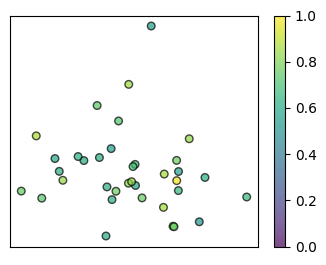

In [93]:
sim_pair = np.argmax(mixed_Y[10]) #sim_pairs_index["manhattan_hamming"]
print(sim_pair)
indices = [i for i, y in enumerate(mixed_Y) if y[sim_pair] > 0]
print(len(indices))
plt.figure(figsize=(4, 3))
plt.scatter(
    Xemb[indices, 0], Xemb[indices, 1],
    s=30, c=Y[indices, sim_pair],
    edgecolors=["black" if i < mixed_X.shape[0] else "none" for i in indices],
    linewidth=[1 if i < mixed_X.shape[0] else 0 for i in indices],
    alpha=0.7, vmin=0, vmax=1)
# plt.scatter(Xemb[bad, 0], Xemb[bad, 1], s=10, c="red", alpha=0.7)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

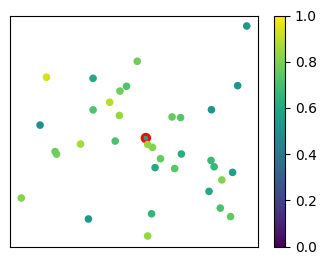

In [58]:
i = selected_datasets[0]
plt.figure(figsize=(4, 3))
plt.scatter(
    Xemb[:, 0], Xemb[:, 1], c=Y[:mixed_X.shape[0], 0], s=30, alpha=1, 
    edgecolors=['none' if k!=i else "red" for k in range(Xemb.shape[0])],
    linewidth=[0 if k!=i else 2 for k in range(Xemb.shape[0])],
    vmin=0, vmax=1
)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

classes distribution in train set: (array([0, 1]), array([ 99, 485], dtype=int64))
classes distribution in train set: (array([0, 1]), array([ 9, 90], dtype=int64))
Epoch 1/150: train_loss=0.342 sim=0.0564 dis=0.1, val_loss=0.28 sim=0.171 dis=0.212
Epoch 2/150: train_loss=0.238 sim=0.147 dis=0.289, val_loss=0.174 sim=0.476 dis=0.54
Epoch 3/150: train_loss=0.172 sim=0.362 dis=0.551, val_loss=0.157 sim=0.79 dis=0.847
Epoch 4/150: train_loss=0.163 sim=0.553 dis=0.676, val_loss=0.143 sim=0.85 dis=0.885
Epoch 5/150: train_loss=0.146 sim=0.574 dis=0.704, val_loss=0.129 sim=0.873 dis=0.892
Epoch 6/150: train_loss=0.133 sim=0.588 dis=0.741, val_loss=0.121 sim=0.911 dis=0.923
Epoch 7/150: train_loss=0.127 sim=0.6 dis=0.771, val_loss=0.115 sim=0.924 dis=0.939
Epoch 8/150: train_loss=0.122 sim=0.601 dis=0.792, val_loss=0.113 sim=0.941 dis=0.956
Epoch 9/150: train_loss=0.118 sim=0.591 dis=0.808, val_loss=0.111 sim=0.959 dis=0.973
Epoch 10/150: train_loss=0.115 sim=0.578 dis=0.818, val_loss=0.111 si

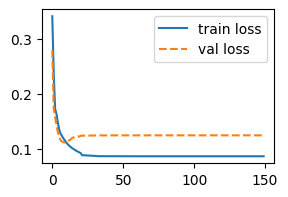

In [83]:
np.random.seed(1234)
test_index = np.random.choice(selected_datasets, size=3, replace=False)
# test_index = selected_datasets
train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
X_train, X_test = X[train_index], X[test_index]
Y_trainr, Y_testr = Y[train_index], Y[test_index]
Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
embeddings = [Xemb]
network = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 2),
)

# network = nn.Sequential(
#     View((-1, 1, X_train.shape[1])),
#     nn.Conv1d(1, 8, 5, stride=1, padding="same"), #300
#     nn.ReLU(),
#     nn.Conv1d(8, 8, 3, stride=3, padding=0), #100
#     nn.ReLU(),
#     nn.Conv1d(8, 16, 3, stride=1, padding="same"), #100
#     nn.ReLU(),
#     nn.Conv1d(16, 16, 2, stride=2, padding=0), #50
#     nn.ReLU(),
#     nn.Conv1d(16, 32, 3, stride=1, padding=0), #48
#     nn.ReLU(),
#     nn.Conv1d(32, 64, 4, stride=4, padding=0), #12
#     nn.ReLU(),
#     nn.Conv1d(64, 128, 3, stride=3, padding=0), #4
#     nn.ReLU(),
#     nn.Flatten(),
#     nn.Linear(128*4, 32)
#     # nn.ReLU(),
#     # nn.Linear(256, 32)
# )
# network.to(device)
model = MetaModel(network, margin=1, device=device)
# network = nn.Sequential(
#     nn.Linear(X_train.shape[1], 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 16),
#     # nn.ReLU(),
#     # nn.Linear(16, 8)
# )
# network.to(device)
# decoder = nn.Sequential(
#     # nn.Linear(8, 16),
#     # nn.ReLU(),
#     nn.Linear(16, 32),
#     nn.ReLU(),
#     nn.Linear(32, 64),
#     nn.ReLU(),
#     nn.Linear(64, X_train.shape[1])
# )
# decoder.to(device)
# model = MetaModel2(network, decoder, device=device)

for i in range(1):
    # metric_learning_params = {
    #     "lr": 1e-3,
    #     "weight_decay": 1e-5,
    #     "epochs": 200,
    #     "batch_size_train": 16,
    #     "batch_size_val": 16,
    # }
    # # new_X_train = []
    # # for x in X_train:
    # #     for _ in range(100):
    # #         new_X_train.append(np.random.normal(x, 0.01))
    # # new_X_train = np.array(new_X_train)
    # model.train_metric_learner(
    #     X_train,
    #     metric_learning_params,
    #     X_val=X_test
    # )
    # plt.figure(figsize=(3, 2))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 1e-5,
        "epochs": 150,
        "batch_size_train": 32,
        "batch_size_val": 32,
    }
    j = 67
    model.train_metric_learner(
        X_train, Y_trainn,
        metric_learning_params,
        X_val=X_test, Y_val=Y_testn
    )
    plt.figure(figsize=(3, 2))
    plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    plt.legend()
    plt.show()

    embeddings.append(model.embbed(mixed_X))
    # embeddings.append(TSNE(n_components=2).fit_transform(model.embbed(mixed_X)))

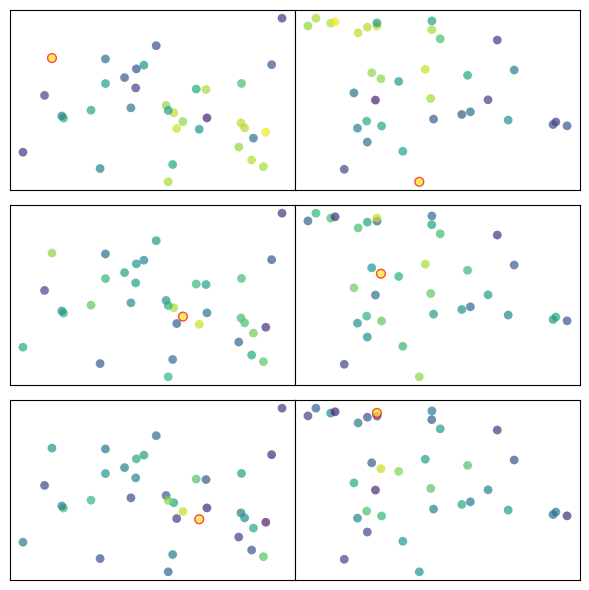

In [84]:
rows, cols = len(test_index), len(embeddings)
plt.figure(figsize=(cols*3, rows*2))
for i, ind in enumerate(test_index):
    for j, Z in enumerate(embeddings):
        plt.subplot(rows, cols, i*cols + j + 1)
        plt.scatter(
            Z[:, 0], Z[:, 1], c=sim_matrix[ind][:mixed_X.shape[0]], s=40, alpha=0.7, 
            edgecolors=['none' if k!=ind else "red" for k in range(Z.shape[0])],
            linewidth=[0 if  k!=ind else 1 for k in range(Z.shape[0])],
            vmin=0., vmax=1)
        # plt.colorbar()
        plt.xticks([])
        plt.yticks([])
plt.tight_layout(w_pad=0)
plt.show()

In [237]:
# from sklearn.model_selection import KFold
# ranking_model_names = ["KNN", "RF"] #, "KNN with aug.", "RF with aug."
# for name in ranking_model_names:
#     predictions[f"AE+{name}"] = np.zeros(shape=Y[selected_datasets].shape)

# i = 0
# for train, test in KFold(n_splits=10, shuffle=True, random_state=0).split(X[selected_datasets]):
#     print(i, "---------------------------------------")
#     test_index = selected_datasets[test]

#     train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
#     train_index_aug = [i for i in range(X.shape[0]) if i not in test_index]
#     X_train, X_test = X[train_index], X[test_index]
#     Y_trainr, Y_testr = Y[train_index], Y[test_index]
#     Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
#     X_train_aug = X[train_index_aug]
#     Y_trainr_aug = Y[train_index_aug]
#     Y_trainn_aug = Yn[train_index_aug]

#     network = nn.Sequential(
#         nn.Linear(X_train.shape[1], 64),
#         nn.ReLU(),
#         nn.Linear(64, 32),
#         nn.ReLU(),
#         nn.Linear(32, 16),
#         # nn.ReLU(),
#         # nn.Linear(16, 8),
#         # nn.ReLU(),
#         # nn.Linear(8, 4)
#     )
#     network.to(device)
#     decoder = nn.Sequential(
#         # nn.Linear(4, 8),
#         # nn.ReLU(),
#         # nn.Linear(8, 16),
#         # nn.ReLU(),
#         nn.Linear(16, 32),
#         nn.ReLU(),
#         nn.Linear(32, 64),
#         nn.ReLU(),
#         nn.Linear(64, X_train.shape[1])
#     )
#     decoder.to(device)
#     model = MetaModel2(network, decoder, device=device)
#     metric_learning_params = {
#         "lr": 1e-3,
#         "weight_decay": 1e-5,
#         "epochs": 300,
#         "batch_size_train": 16,
#         "batch_size_val": 16,
#     }
#     model.train_metric_learner(
#         X_train,
#         metric_learning_params,
#         X_val=X_test
#     )

#     # plt.figure(figsize=(4, 2.5))
#     # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
#     # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
#     # plt.legend()
#     # plt.show()

#     Z_train = model.embbed(X_train)
#     for name in ["KNN", "RF"]:
#         model.ranker = ALL_MODELS[name]()
#         model.train_ranker(Z_train, Y_trainr)
#         predictions[f"AE+{name}"][test] = model.predict(X_test)

#     # network = nn.Sequential(
#     #     nn.Linear(X_train.shape[1], 64),
#     #     nn.ReLU(),
#     #     nn.Linear(64, 32),
#     #     nn.ReLU(),
#     #     nn.Linear(32, 16),
#     #     # nn.ReLU(),
#     #     # nn.Linear(16, 8),
#     #     # nn.ReLU(),
#     #     # nn.Linear(8, 4)
#     # )
#     # network.to(device)
#     # decoder = nn.Sequential(
#     #     # nn.Linear(4, 8),
#     #     # nn.ReLU(),
#     #     # nn.Linear(8, 16),
#     #     # nn.ReLU(),
#     #     nn.Linear(16, 32),
#     #     nn.ReLU(),
#     #     nn.Linear(32, 64),
#     #     nn.ReLU(),
#     #     nn.Linear(64, X_train.shape[1])
#     # )
#     # decoder.to(device)
#     # model = MetaModel2(network, decoder, device=device)
#     # metric_learning_params = {
#     #     "lr": 1e-3,
#     #     "weight_decay": 1e-4,
#     #     "epochs": 250,
#     #     "batch_size_train": 16,
#     #     "batch_size_val": 16,
#     # }
#     # model.train_metric_learner(
#     #     X_train_aug,
#     #     metric_learning_params,
#     #     X_val=X_test
#     # )

#     # # plt.figure(figsize=(4, 2.5))
#     # # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
#     # # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
#     # # plt.legend()
#     # # plt.show()

#     # Z_train_aug = model.embbed(X_train_aug)
#     # for name in ["KNN with aug.", "RF with aug."]:
#     #     model.ranker = ALL_MODELS[name.split(" ")[0]]()
#     #     model.train_ranker(Z_train_aug, Y_trainr_aug)
#     #     predictions[f"AE+{name}"][test] = model.predict(X_test)
#     i += 1

In [51]:
from sklearn.model_selection import KFold
ranking_model_names = ["KNN", "RF"] # , "KNN with aug.", "RF with aug."
for name in ranking_model_names:
    predictions[f"Mtrl+{name}"] = np.zeros(shape=Y[selected_datasets].shape)

i = 0
for train, test in cv.split(X[selected_datasets]):
    print(i, "---------------------------------------")
    test_index = selected_datasets[test]

    train_index = [i for i in range(mixed_X.shape[0]) if i not in test_index]
    train_index_aug = [i for i in range(X.shape[0]) if i not in test_index]
    X_train, X_test = X[train_index][:, selected_features], X[test_index][:, selected_features]
    Y_trainr, Y_testr = Y[train_index], Y[test_index]
    Y_trainn, Y_testn = Yn[train_index], Yn[test_index]
    X_train_aug = X[train_index_aug]
    Y_trainr_aug = Y[train_index_aug]
    Y_trainn_aug = Yn[train_index_aug]

    network = nn.Sequential(
        nn.Linear(X_train.shape[1], 16),
        # nn.ReLU(),
        # nn.Linear(128, 64),
        # nn.ReLU(),
        # nn.ReLU(),
        # nn.Linear(16, 8),
        # nn.ReLU(),
        # nn.Linear(8, 4),
    )
    network.to(device)
    model = MetaModel(network, margin=2, device=device)
    metric_learning_params = {
        "lr": 1e-3,
        "weight_decay": 0,
        "epochs": 200,
        "batch_size_train": 32,
        "batch_size_val": 32,
    }
    model.train_metric_learner(
        X_train, Y_trainn,
        metric_learning_params,
        X_val=X_test, Y_val=Y_testn
    )

    # plt.figure(figsize=(4, 2.5))
    # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # plt.legend()
    # plt.show()

    Z_train = model.embbed(X_train)
    for name in ["KNN", "RF"]:
        model.ranker = ALL_MODELS[name]()
        model.train_ranker(Z_train, Y_trainn)
        predictions[f"Mtrl+{name}"][test] = model.predict(X_test)

    ##################################################
    # network = nn.Sequential(
    #     nn.Linear(X_train.shape[1], 64),
    #     nn.ReLU(),
    #     nn.Linear(64, 32),
    #     nn.ReLU(),
    #     nn.Linear(32, 24),
    #     # nn.ReLU(),
    #     # nn.Linear(16, 8),
    #     # nn.ReLU(),
    #     # nn.Linear(8, 4),
    # )
    # network.to(device)
    # model = MetaModel(network, margin=1, device=device)
    # metric_learning_params = {
    #     "lr": 1e-3,
    #     "weight_decay": 1e-4,
    #     "epochs": 100,
    #     "batch_size_train": 256,
    #     "batch_size_val": 256,
    # }
    # model.train_metric_learner(
    #     X_train_aug, Y_trainn_aug,
    #     metric_learning_params,
    #     X_val=X_test, Y_val=Y_testn
    # )

    # # plt.figure(figsize=(4, 2.5))
    # # plt.plot(model.metric_learner.history["train"]["loss"], label="train loss")
    # # plt.plot(model.metric_learner.history["val"]["loss"], "--", label="val loss")
    # # plt.legend()
    # # plt.show()

    # Z_train_aug = model.embbed(X_train_aug)
    # for name in ["KNN with aug.", "RF with aug."]:
    #     model.ranker = ALL_MODELS[name.split(" ")[0]]()
    #     model.train_ranker(Z_train_aug, Y_trainn_aug)
    #     predictions[f"Mtrl+{name}"][test] = model.predict(X_test)
    i+=1

0 ---------------------------------------
classes distribution in train set: (array([0, 1]), array([140, 304], dtype=int64))
classes distribution in train set: (array([0, 1]), array([ 40, 184], dtype=int64))
Epoch 1/200: train_loss=1.67 sim=2.79 dis=2.8, val_loss=1.71 sim=3.4 dis=3.84
Epoch 2/200: train_loss=1.64 sim=2.76 dis=2.78, val_loss=1.68 sim=3.37 dis=3.81
Epoch 3/200: train_loss=1.61 sim=2.74 dis=2.76, val_loss=1.66 sim=3.35 dis=3.78
Epoch 4/200: train_loss=1.59 sim=2.71 dis=2.73, val_loss=1.64 sim=3.32 dis=3.76
Epoch 5/200: train_loss=1.56 sim=2.69 dis=2.71, val_loss=1.61 sim=3.3 dis=3.73
Epoch 6/200: train_loss=1.54 sim=2.66 dis=2.69, val_loss=1.59 sim=3.27 dis=3.7
Epoch 7/200: train_loss=1.51 sim=2.64 dis=2.67, val_loss=1.57 sim=3.25 dis=3.67
Epoch 8/200: train_loss=1.49 sim=2.62 dis=2.65, val_loss=1.54 sim=3.23 dis=3.65
Epoch 9/200: train_loss=1.46 sim=2.59 dis=2.62, val_loss=1.52 sim=3.2 dis=3.62
Epoch 10/200: train_loss=1.44 sim=2.57 dis=2.6, val_loss=1.5 sim=3.18 dis=3.6

In [52]:
baseline_pairs = {
    "haverage": "manhattan_hamming",
    "fasterpam": "euclidean_hamming",
    "kprototypes": "sqeuclidean_hamming",
}
similarity_pairs = benchmark_results[algorithm]["original"][eval_metric].columns
sim_pairs_index = dict(zip(similarity_pairs, range(len(similarity_pairs))))

ndcg_ranks = [1, 3, 5, 10, 15, 20]
n_bests = [1, 3, 5, 10]
ndcg_scores = {
    model_name: {p: np.zeros(len(selected_datasets)) for p in ndcg_ranks}
    for model_name in predictions
} #| {'ensemble': {p: np.zeros(meta_X.shape[0]) for p in ndcg_ranks}}

lb_scores = np.zeros(len(selected_datasets))
rb_scores = {k: np.zeros(len(selected_datasets)) for k in n_bests}
mb_scores = np.zeros(len(selected_datasets))
model_scores = {
    model_name: {k: np.zeros(len(selected_datasets)) for k in n_bests}
    for model_name in predictions
} #| {'ensemble': {k: np.zeros(len(test_index)) for k in n_bests}}

for name, Y_pred in predictions.items():
    Y_pred = np.array(Y_pred)
    for p in ndcg_ranks:
        ndcg_scores[name][p] = ndcg(Y[selected_datasets], Y_pred, p=p)

for name, Y_pred in predictions.items():
    Y_pred = np.array(Y_pred)
    for k in n_bests:
        model_scores[name][k] = np.array(
            [max(y[y > 0][np.argsort(-Y_pred[i][y > 0])[:k]]) for i, y in enumerate(Y[selected_datasets])])

for k in n_bests:
    rb_scores[k] = np.array(
        [max(np.random.choice(y[y > 0], k)) for y in Y[selected_datasets]])

lb_scores = Y[selected_datasets][:, sim_pairs_index[baseline_pairs[algorithm]]]
mb_scores = np.array([max(y) for y in Y[selected_datasets]])

c:\Users\abdou\Documents\Workspace\Recherche\simrec-for-mdc\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\abdou\Documents\Workspace\Recherche\simrec-for-mdc\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


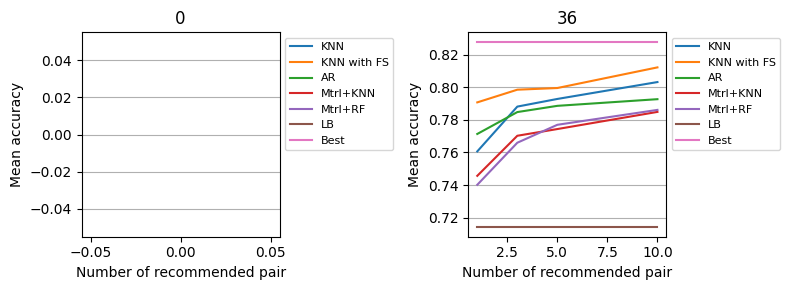

In [53]:
import matplotlib.pyplot as plt

list_indices = [
    [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) < 0.0], #test_index[i] in base_datasets and # i in test and
    [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) >= 0.]
]
rows, cols = 1, len(list_indices)
plt.figure(figsize=(cols*4, rows*3))
subplot_num = 1
exclude = [] #"KNN with aug.", "RF with aug." - "KNN", "RF", "AE+KNN", "AE+RF"
for indices in list_indices:
    scores = {k:v for k, v in model_scores.items() if k not in exclude} 
    # scores["RB"] = rb_scores
    scores["LB"] = lb_scores
    scores["Best"] = mb_scores

    y = {key: [] for key in scores}

    for name, score in scores.items():
        for k in n_bests:
            u = score[indices] if name in ["LB", "Best"] else score[k][indices]
            y[name].append(np.mean(u))

    plt.subplot(rows, cols, subplot_num)
    for name, values in y.items():
        plt.plot(n_bests, values, label=name)
    plt.ylabel("Mean accuracy")
    plt.xlabel("Number of recommended pair")
    # plt.ylim((0.67, 0.9))
    plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1))
    plt.grid(axis="y")
    plt.title(len(indices))
    subplot_num += 1
plt.tight_layout()
# plt.savefig("output/mean_acc2.svg")
plt.show()

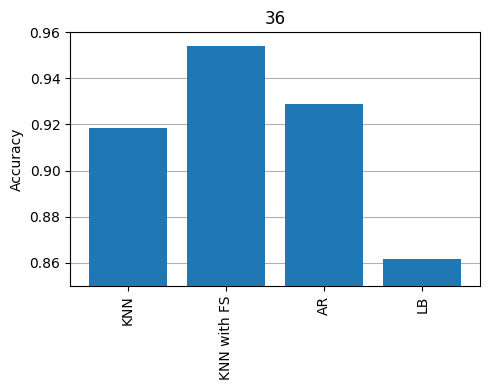

In [37]:
import matplotlib.pyplot as plt

indices = [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) >= 0]

exclude = []
scores = {k:v for k, v in model_scores.items() if k not in exclude} 
# scores["RB"] = rb_scores
scores["LB"] = lb_scores

y = {key: [] for key in scores}
k = 1
best_scores = mb_scores[indices]
for name, score in scores.items():
    u = score[indices] if name in ["LB", "Best"] else score[k][indices]
    y[name] = np.mean(u/best_scores)

plt.figure(figsize=(5, 4))
plt.bar(y.keys(), y.values(), zorder=5)
plt.ylabel("Accuracy")
plt.ylim((0.85, 0.96))
plt.xticks(rotation="vertical")
# plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1))
plt.grid(axis="y")
plt.title(len(indices))
plt.tight_layout()
# plt.savefig("output/mean_acc2.svg")
plt.show()

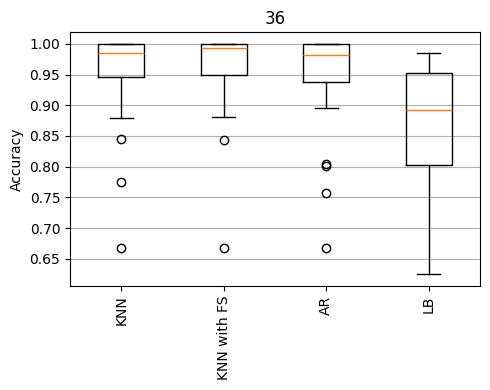

In [38]:
import matplotlib.pyplot as plt

indices = [i for i, y in enumerate(Y[selected_datasets]) if np.mean(1 - y[y>0]/max(y[y>0])) >= 0.]

exclude = []
scores = {k:v for k, v in model_scores.items() if k not in exclude} 
# scores["RB"] = rb_scores
scores["LB"] = lb_scores

y = {key: [] for key in scores}
k = 5
best_scores = mb_scores[indices]
for name, score in scores.items():
    u = score[indices] if name in ["LB", "Best"] else score[k][indices]
    y[name] = u/best_scores

plt.figure(figsize=(5, 4))
plt.boxplot(y.values(), labels=y.keys())
plt.ylabel("Accuracy")
# plt.ylim((0.67, 0.9))
plt.xticks(rotation="vertical")
# plt.legend(fontsize=8, loc= "upper left", bbox_to_anchor= (1, 1))
plt.grid(axis="y")
plt.title(len(indices))
plt.tight_layout()
# plt.savefig("output/mean_acc2.svg")
plt.show()